# Medical Cost Analysis

In [1]:
import pandas as pd # import required libraries
pd.set_option("display.max_columns",100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#Regressin models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
df=pd.read_csv('insurance.csv') #Reading data from csv file

# EDA - Exploratory Data Analysis

In [3]:
df.info()   #Give information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.head()   #Show the first 5 rows in the data frame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.sample(10) #Show 10 random rows

,age,sex,bmi,children,smoker,region,charges
224,42,male,24.640,0,yes,southeast,19515.54160
945,56,female,35.800,1,no,southwest,11674.13000
168,19,female,31.825,1,no,northwest,2719.27975
1058,24,female,39.490,0,no,southeast,2480.97910
877,33,male,33.440,5,no,southeast,6653.78860
544,54,male,30.210,0,no,northwest,10231.49990
477,25,male,35.625,0,no,northwest,2534.39375
89,55,female,26.980,0,no,northwest,11082.57720
454,32,male,46.530,2,no,southeast,4686.38870
1251,19,male,19.800,0,no,southwest,1241.56500


In [6]:
df.describe() #Generate descriptive statistics

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum() # Detect missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.children.value_counts()  # How many of which children count?

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [9]:
df.smoker.value_counts() #number of smokers and non-smokers

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
df.region.value_counts() #how many people from each region

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## Feature Engineering

In [11]:
df.corr() #Pearson Correlation Matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


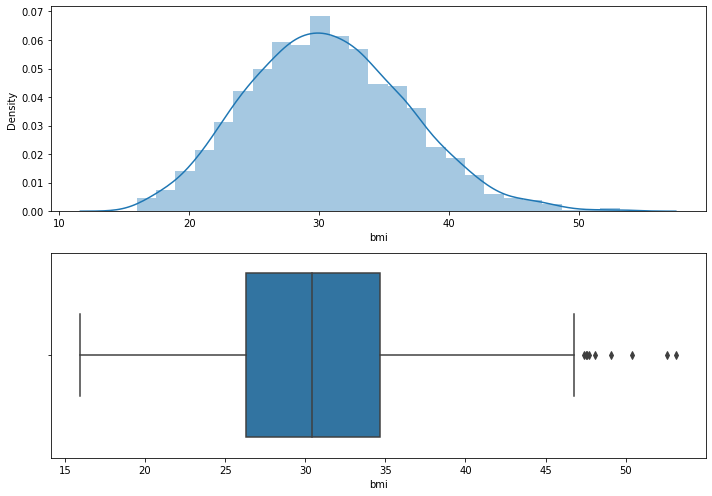

In [12]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['bmi']) #Show distplot to see which bmi have more densit
fig.add_subplot(2,1,2)
sns.boxplot(df['bmi'])  #Show bmi as boxplot to see outliers and common bmi range
plt.tight_layout()

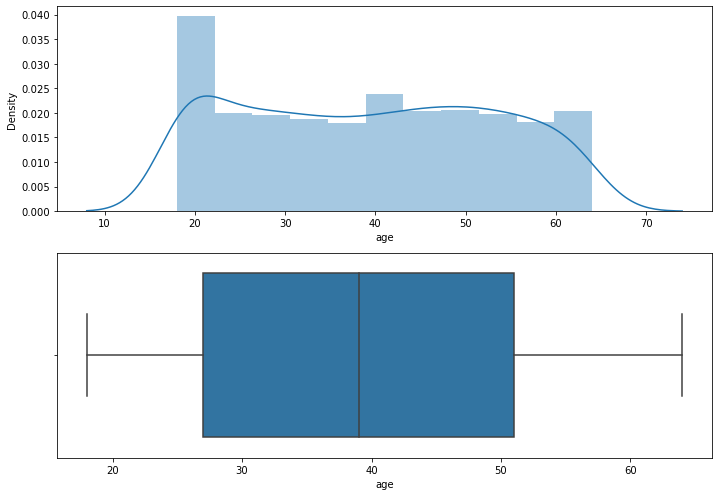

In [13]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['age']) #Show distplot to see which age have more densit
fig.add_subplot(2,1,2)
sns.boxplot(df['age'])  #Show age as boxplot to see outliers and common age range
plt.tight_layout()

<AxesSubplot:xlabel='children', ylabel='bmi'>

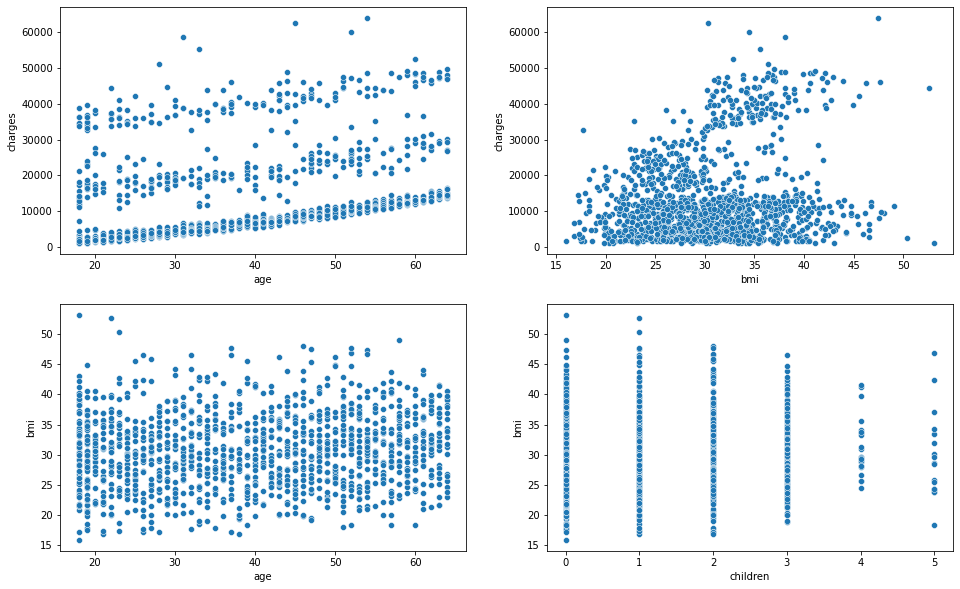

In [14]:
fig = plt.figure(figsize=(16,10))
fig.add_subplot(2,2,1)
sns.scatterplot(df['age'], df['charges']) #Show scatter plot to see intensity and relationship between age and charges
fig.add_subplot(2,2,2)
sns.scatterplot(df['bmi'], df['charges']) #Show scatter plot to see intensity and relationship between bmi and charges
fig.add_subplot(2,2,3)
sns.scatterplot(df['age'], df['bmi'])     #Show scatter plot to see intensity and relationship between age and bmi
fig.add_subplot(2,2,4)
sns.scatterplot(df['children'], df['bmi']) #Show scatter plot to see intensity and relationship between children and bmi

<AxesSubplot:xlabel='smoker', ylabel='charges'>

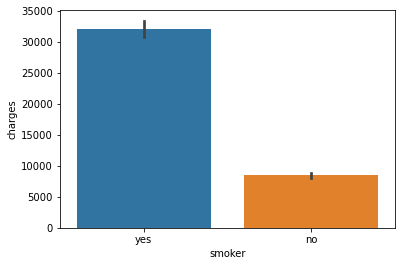

In [15]:
sns.barplot(df['smoker'], df['charges']) #show smoker charges relationship on bar plot

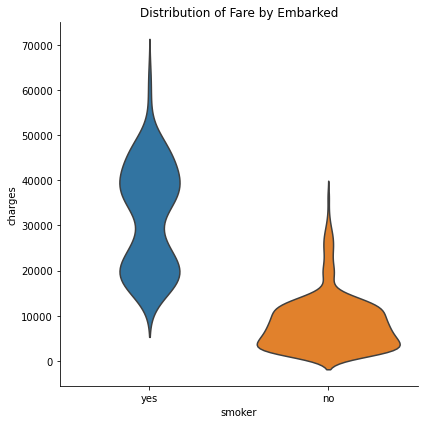

In [16]:
sns.catplot(x='smoker', y='charges', kind='violin', inner=None, data=df,height =6,order = ['yes','no'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

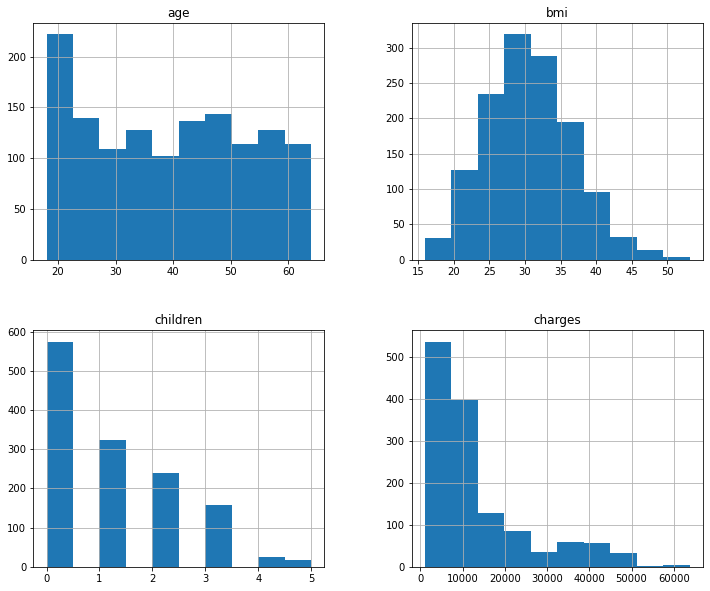

In [17]:
_ = df.hist(figsize=(12, 10))

<AxesSubplot:xlabel='region', ylabel='count'>

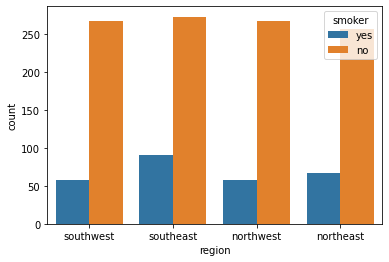

In [18]:
sns.countplot(x = 'region', hue = 'smoker', data=df) #Show smoker by regions

<AxesSubplot:xlabel='sex', ylabel='bmi'>

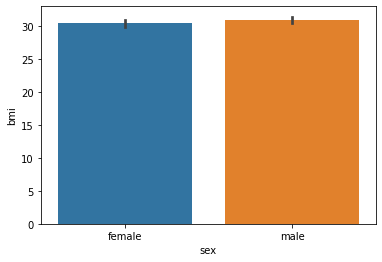

In [19]:
sns.barplot(x='sex', y='bmi',data=df) #show relationship between sex and bmi on bar plot

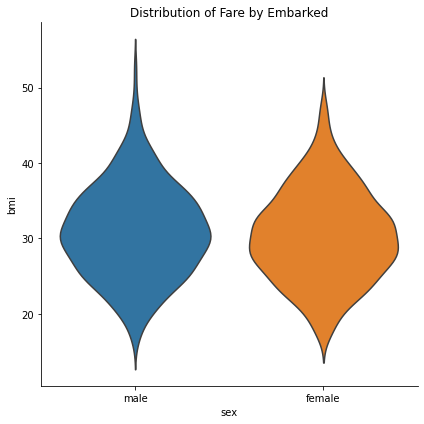

In [20]:
sns.catplot(x='sex', y='bmi', kind='violin', inner=None, data=df,height =6,order = ['male','female'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

<AxesSubplot:xlabel='region', ylabel='count'>

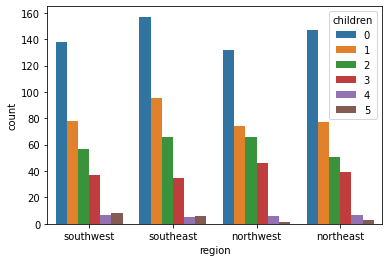

In [21]:
sns.countplot(x = 'region', hue = 'children', data=df) #Show how many children they have by region

In [22]:
df.groupby('region')['children'].sum() #Find the "region" with the most "children"

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

<AxesSubplot:xlabel='children', ylabel='bmi'>

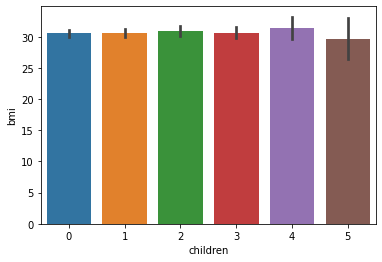

In [23]:
sns.barplot(df['children'], df['bmi'])  #show relationship between children and bmi on bar plot

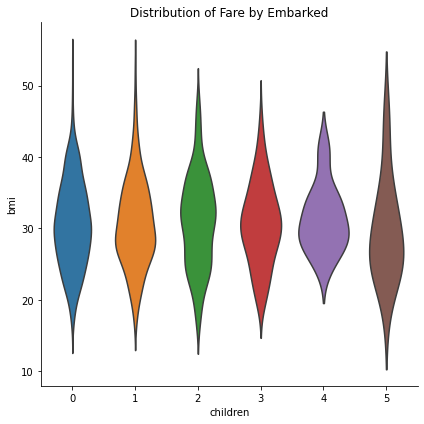

In [24]:
sns.catplot(x='children', y='bmi', kind='violin', inner=None, data=df,height =6,order = [0,1,2,3,4,5])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

<AxesSubplot:xlabel='region', ylabel='bmi'>

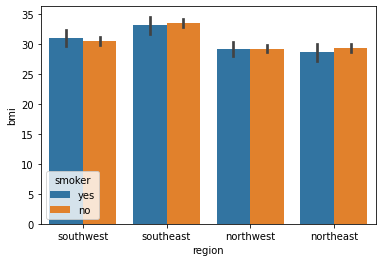

In [25]:
sns.barplot(data=df, x="region", y="bmi",hue="smoker") #show relationship between region and bmi on bar plot

In [26]:
#Inter Quantile Range
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
#REMOVE OUTLİERS
outliers = (df['bmi'] < lower_bound['bmi']) | (df['bmi'] > upper_bound['bmi'])
df['bmi'] = np.where(outliers, np.nan, df['bmi'])

df.dropna(inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   object 
 2   bmi       1329 non-null   float64
 3   children  1329 non-null   int64  
 4   smoker    1329 non-null   object 
 5   region    1329 non-null   object 
 6   charges   1329 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.1+ KB


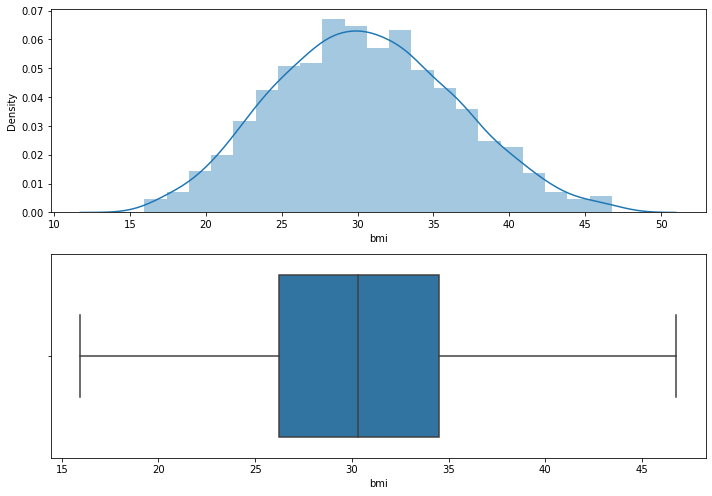

In [28]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['bmi']) #Show distplot to see which bmi have more densit after remove outliers
fig.add_subplot(2,1,2)
sns.boxplot(df['bmi']) # Show prices as boxplot to see outliers and common bmi range after remove outliers
plt.tight_layout()

In [29]:
x, y=df[["age","sex","bmi","children","smoker","region"]],df[['charges']] #assigning charges-influencing columns for training 

In [30]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [31]:
x=pd.get_dummies(x,drop_first=True) #Dummy variable drop_first deletes first column, get_dummies writes strings in int format so we can give them to the model

In [32]:
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [33]:
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [34]:

y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [35]:
# PURPOSE: Train the data in 7 regression models and see the results in tabular form
# PARAMETERS: x: Dataframe containing training data, y: Output variable 
# RETURN: Show model evaluation metrics in ascending order by R_squared
def algo_testing(x, y): 
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    XGBC = XGBRegressor()
    sc = StandardScaler() #STANDART SCALING
    X = sc.fit_transform(x)
    x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=13) 
    algos = [L, E, R, Lass, ETR, GBR, XGBC]
    algo_names = ["Linear","ElasticNet", "Ridge","Lasso","Extra Tree","Gradient Boosting","XGradientBoosting"]
    r_squared = []
    rmse = []
    mae = []
    
    result = pd.DataFrame(columns=["R_Squared","RMSE","MAE"],
                          index = algo_names) 
    for algo in algos:
        algo.fit(x_train,y_train) #Learning from training data with fit. Model learns by looking at x_train data versus y_train data
        algo.predict(x_test)     #Trained model predicts the output for the test data with predict command
        #Calculate model evaluation metrics
        r_squared.append(r2_score(y_test,algo.predict(x_test))) 
        rmse.append(mean_squared_error(y_test,algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test,algo.predict(x_test)))
        
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
    
    return result.sort_values('R_Squared', ascending = False)

In [36]:
algo_testing(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.911595,3568.125209,2134.994032
XGradientBoosting,0.868035,4359.434550,2749.810393
Ridge,0.790336,5494.936357,3962.822534
Lasso,0.790313,5495.244915,3961.467047
Linear,0.790283,5495.628870,3961.644353
ElasticNet,0.710497,6456.951391,4892.303414
Extra Tree,0.685670,6728.124333,3365.658151


In [37]:
sc = StandardScaler() #STANDART SCALING
X = sc.fit_transform(x)

In [38]:
X

array([[-1.43876391, -0.44566964, -0.90793956, ..., -0.56895095,
        -0.60603956,  1.7612075 ],
       [-1.50997605,  0.54626664, -0.07976408, ..., -0.56895095,
         1.65005729, -0.56779227],
       [-0.79785463,  0.41614893,  1.57658687, ..., -0.56895095,
         1.65005729, -0.56779227],
       ...,
       [-1.50997605,  1.06673747, -0.90793956, ..., -0.56895095,
         1.65005729, -0.56779227],
       [-1.29633963, -0.80053612, -0.90793956, ..., -0.56895095,
        -0.60603956,  1.7612075 ],
       [ 1.55214607, -0.24795832, -0.90793956, ...,  1.75762077,
        -0.60603956, -0.56779227]])

In [39]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=13) #Separation of training and test data
print("Values in x_train",x_train)
print("Values in y_train",y_train)

Values in x_train [[-1.50997605  1.97756142 -0.90793956 ... -0.56895095  1.65005729
  -0.56779227]
 [ 1.33850964  1.00421338 -0.90793956 ...  1.75762077 -0.60603956
  -0.56779227]
 [-1.29633963 -0.26401181 -0.90793956 ...  1.75762077 -0.60603956
  -0.56779227]
 ...
 [ 0.34153965 -0.53016166  0.7484114  ... -0.56895095 -0.60603956
   1.7612075 ]
 [ 1.05366108 -0.2259904  -0.07976408 ... -0.56895095 -0.60603956
   1.7612075 ]
 [-1.0827032  -0.49636485 -0.90793956 ... -0.56895095 -0.60603956
   1.7612075 ]]
Values in y_train           charges
803   38792.68560
1151  12235.83920
751    1906.35825
553   11187.65670
781    1146.79660
...           ...
872    5966.88740
746   11737.84884
74     7726.85400
177   10436.09600
340   18955.22017

[1063 rows x 1 columns]


In [40]:
#Use GBRegressor as the most efficient estimates are obtained in GBRegressor model
GBR =  GradientBoostingRegressor()
model = GBR.fit(x_train, y_train)
pred = model.predict(x_test)

In [41]:
y_test= np.array(y_test)
pred = np.array(pred)

In [42]:
# PURPOSE: Create regression chart
# PARAMETERS: pred:Predictions based on test data, y:Output variable
# RETURN:N/A
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred':pred, 'y':y})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

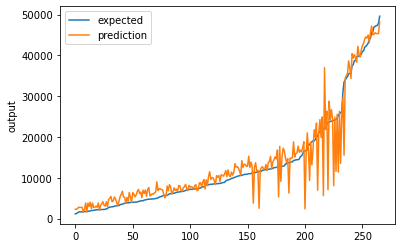

In [43]:
chart_regression(pred.flatten(),y_test.flatten()) #Create chart regression. Show expected value and predictions

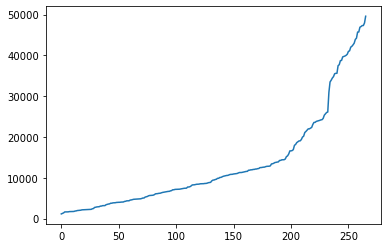

In [44]:
t = pd.DataFrame({'y':y_test.flatten()})
sort=True
if sort:
    t.sort_values(by=['y'], inplace=True)
plt.plot(t['y'].tolist(), label='expected') #Show expected values on chart

### Hyperparamter Optimization with Random Search

#### Random Search

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [46]:
model2 = GradientBoostingRegressor()
parameters = {'learning_rate': sp_randFloat(),
              'subsample'    : sp_randFloat(),
              'n_estimators' : sp_randInt(100,1000),
              'max_depth'    : sp_randInt(2,10)
             }


In [47]:
randm = RandomizedSearchCV(estimator = model2, param_distributions = parameters,
                          cv = 5, n_iter = 100, n_jobs = -1 )
randm.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028D9F10D4F0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028D9F10D370>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028D9F10D8B0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028D9FEEE280>})

In [48]:
print("\n==============================")
print(" Results from Random Search")
print("\n The best estimator across ALL searched params:\n",
      randm.best_estimator_)
print("\n The best score across ALL searched params:\n",
      randm.best_score_)
print("\n The best parameters across ALL searched params:\n",
      randm.best_params_)


 Results from Random Search

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.0220663673590501, max_depth=2,
                          n_estimators=803, subsample=0.524813275551164)

 The best score across ALL searched params:
 0.8398048470715785

 The best parameters across ALL searched params:
 {'learning_rate': 0.0220663673590501, 'max_depth': 2, 'n_estimators': 803, 'subsample': 0.524813275551164}


In [49]:
GBR = GradientBoostingRegressor(learning_rate=0.0220663673590501, max_depth=2,
                          n_estimators=803, subsample=0.524813275551164) 
model = GBR.fit(x_train, y_train)
pred = model.predict(x_test)
r2_score(y_test,pred)

0.9086943857122912

#### Grid Search

In [50]:
from sklearn.model_selection import GridSearchCV
model3 = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01, 0.02, 0.03],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [100, 500, 1000],
              'max_depth'    : [4,6,8]
             }

In [51]:
grid = GridSearchCV(estimator = model3, param_grid = parameters,
                          cv = 5, n_jobs = -1)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2]})

In [52]:
print("\n==============================")
print(" Results from Random Search")
print("\n The best estimator across ALL searched params:\n",
      grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
      grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
      grid.best_params_)



 Results from Random Search

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.9)

 The best score across ALL searched params:
 0.8450826656351419

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


In [53]:
GBR2 = GradientBoostingRegressor(learning_rate=0.03, 
                                 max_depth=4, subsample=0.9)
model = GBR2.fit(x_train, y_train)
pred = model.predict(x_test)
r2_score(y_test,pred)   

0.9073427223227454